# Project 2: Investigating relations between education, patents, work sector and income over time

### The purpose of this project is to investigate the relations between education, patents, work sector and income over a specific period of time, for which we have the data available.

### The objective is to support, through data analysis, 4 few theories that I formulated. 
### In particular:
>### 1) Education should have a positive impact on income, as the more knowledgeable people of a specific country are, the more that country should be able to produce prosperity
>### 2) The number of patent applications in a country should have a positive impact on its income, due to the increase of its technological level
>### 3) Education should have a positive impact in the number of patent applications, as a higher knowledge helps in generating innovative ideas
>### 4) Also the main sectors have an impact on the income, as a country being "service-oriented" should be a sign that its technology is advanced, as opposite as a country for which the main sector is "agricultural" or "industrial"

#### For the data analysis, I downloaded the following the datasets from the website "www.gapminder.org":
>##### 'mean_years_in_school_men_25_years_and_older.csv'
>##### 'mean_years_in_school_women_25_years_and_older.csv'
>##### 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv'
>##### 'patent_applications_total.csv'
>##### 'population_total.csv'
>##### 'agriculture_workers_percent_of_employment.csv'
>##### 'industry_workers_percent_of_employment.csv'
>##### 'service_workers_percent_of_employment.csv'

In [1]:
# import packages that I'm going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
% matplotlib inline
import seaborn as sns

## Now we are going to wrangle the "number of years in school" dataset

In [2]:
# import datasets about the number of years in school for men and women 25+ years old, as around this age
# we assume the majority of people has terminated its education period

ys_edu_M = pd.read_csv('mean_years_in_school_men_25_years_and_older.csv')
ys_edu_F = pd.read_csv('mean_years_in_school_women_25_years_and_older.csv')

##### Quick look to the datasets

In [3]:
ys_edu_M.head(2) 

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6
1,Albania,5.1,5.2,5.3,5.5,5.6,5.7,5.9,6.0,6.1,...,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2


In [4]:
ys_edu_M.shape

(174, 41)

In [5]:
ys_edu_F.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4
1,Albania,3.9,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,...,8.0,8.2,8.3,8.5,8.6,8.8,8.9,9.1,9.2,9.4


In [6]:
ys_edu_F.shape

(174, 41)

##### Under the assumption that the population is equally divided by gender (50% males and 50% females), I create a dataframe with the average number of years of school, for each country and for each year

In [7]:
ys_edu_countylist = ys_edu_M.iloc[:,:1] ## create a series with names of countries

ys_edu_tot = (ys_edu_M.iloc[:,:] + ys_edu_F.iloc[:,1:])/2   # compute the average
ys_edu_tot['country'] = ys_edu_countylist
ys_edu_tot.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,country
0,0.35,0.40,0.45,0.45,0.45,0.50,0.50,0.50,0.55,0.55,...,1.20,1.25,1.30,1.30,1.35,1.35,1.40,1.45,1.50,Afghanistan
1,4.50,4.60,4.70,4.85,4.95,5.10,5.25,5.35,5.45,5.60,...,8.70,8.85,9.00,9.10,9.30,9.40,9.55,9.65,9.80,Albania
2,0.75,0.75,0.80,0.90,0.90,1.00,1.00,1.10,1.15,1.20,...,3.45,3.55,3.70,3.80,3.95,4.10,4.20,4.30,4.45,Algeria
3,0.95,1.00,1.00,1.05,1.15,1.15,1.20,1.30,1.35,1.35,...,3.05,3.20,3.30,3.40,3.50,3.60,3.75,3.85,3.95,Angola
4,7.00,7.10,7.20,7.40,7.50,7.65,7.80,7.95,8.10,8.25,...,11.25,11.35,11.45,11.55,11.65,11.70,11.80,11.90,12.00,Antigua and Barbuda


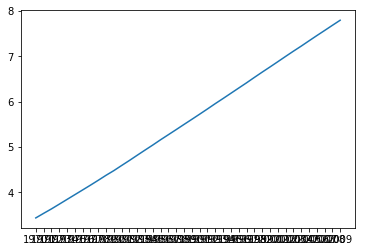

In [8]:
# plotting the mean of number of years of education for each year
plt.plot(ys_edu_tot.mean());

##### As the line-chart above shows, the trend in the number of school years is consistently increasing over time. 
##### Now I'm going to calculate, for each country, the increase in the number of years of school, between 1970 and 2009

In [9]:
ys_edu_tot['delta_edu'] = ys_edu_tot['2009'] - ys_edu_tot['1970']
ys_edu_tot.head(2)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2002,2003,2004,2005,2006,2007,2008,2009,country,delta_edu
0,0.35,0.4,0.45,0.45,0.45,0.5,0.50,0.50,0.55,0.55,...,1.25,1.3,1.3,1.35,1.35,1.40,1.45,1.5,Afghanistan,1.15
1,4.50,4.6,4.70,4.85,4.95,5.1,5.25,5.35,5.45,5.60,...,8.85,9.0,9.1,9.30,9.40,9.55,9.65,9.8,Albania,5.30


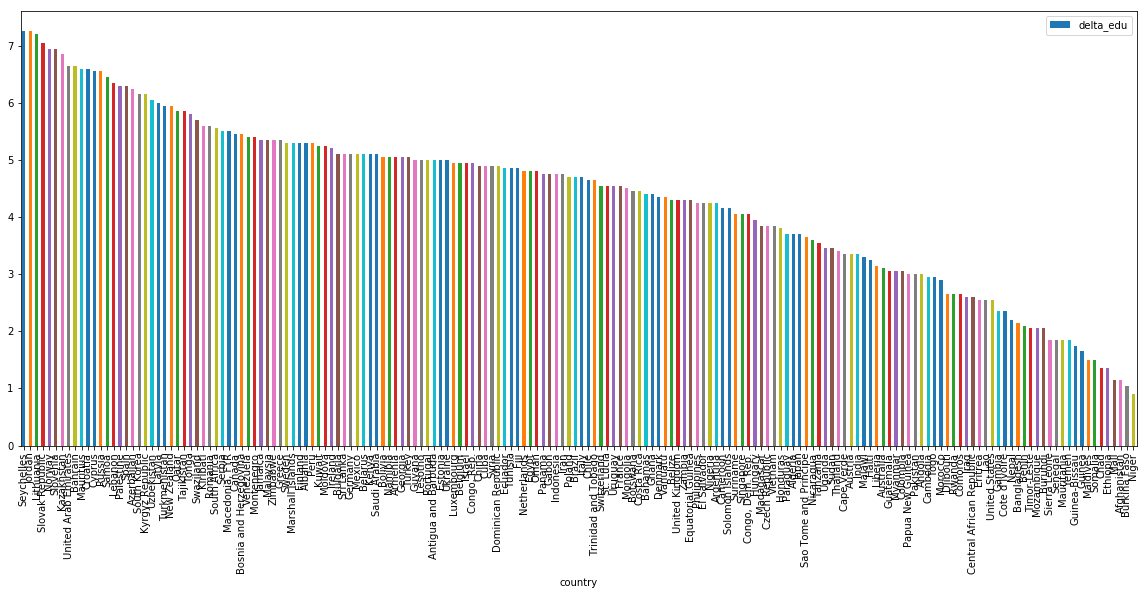

In [10]:
# bar-chart to show the increase of number of years of education per country (descending)
ys_edu_tot.sort_values('delta_edu', ascending=False).plot(kind='bar',x='country',y='delta_edu', figsize=(20,8));

## Now we are going to wrangle the "Income" dataset

In [11]:
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9520,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6180,6260,6230,6020,5940,5850


#### Here we are going to have a look of the overall trend in the income over time, in the period matching the "number of years in school" dataset

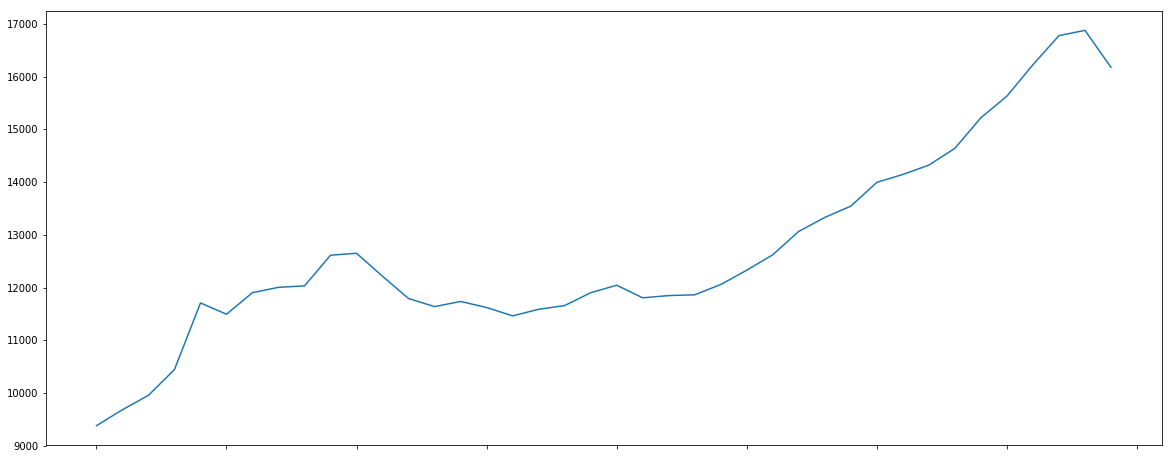

In [12]:
income.loc[:,'1970':'2009'].mean().plot(figsize=(20,8));

In [13]:
# income from 1970 to 2009 in new column 'delta_inc'
income['delta_inc'] = income['2009'] - income['1970']
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,delta_inc
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1610,1660,1840,1810,1780,1750,1740,1800,1870,350
1,Albania,667,667,667,667,667,668,668,668,668,...,9930,10200,10400,10500,10700,11000,11400,11900,12400,5690
2,Algeria,715,716,717,718,719,720,721,722,723,...,12900,13000,13200,13300,13500,13700,14000,13800,13700,5310
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,39000,42000,41900,43700,44900,46600,48200,49800,51500,8500
4,Angola,618,620,623,626,628,631,634,637,640,...,5900,5910,6000,6180,6260,6230,6020,5940,5850,360


In [14]:
# Here below I'm merging the 2 datasets about the number of years in school and the income, in order to compare them
df_deltas = ys_edu_tot.merge(income,on='country',how='inner')
df_deltas_edu_inc=df_deltas[['country','delta_edu','delta_inc']]
df_deltas_edu_inc.head(2)

,country,delta_edu,delta_inc
0,Afghanistan,1.15,350
1,Albania,5.30,5690


## Research Question 1
### Here below I'm plotting a scatter plot between the number of years in school and the income, in order to investigate the correlation between these 2 variables

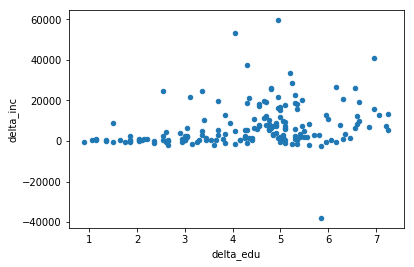

In [15]:
df_deltas_edu_inc.plot(x='delta_edu', y='delta_inc' , kind='scatter');

In [22]:
df_deltas_edu_inc['delta_edu'].corr(df_deltas_edu_inc['delta_inc'])

0.27077806912557645

### Results: Slight positive correlation (0.27) between education and income, which indicates that the data would partially fit my theory at point 1)

## Now we are going to wrangle the 'patent applications' variable

In [23]:
# import datasets about the number of patent application

patent = pd.read_csv('patent_applications_total.csv')
patent.head(2)

,country,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1560.0,18800.0,26000.0,35200.0,89500.0,112000.0,130000.0,89800.0
1,Algeria,315.0,277.0,269.0,230.0,206.0,204.0,185.0,139.0,144.0,121.0,144.0,142.0,198.0,240.0,306.0,282.0,33600.0,72300.0,88900.0


In [24]:
patent.shape

(147, 20)

In [25]:
patent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 20 columns):
country    147 non-null object
1984       86 non-null float64
1985       90 non-null float64
1986       84 non-null float64
1987       77 non-null float64
1988       85 non-null float64
1989       85 non-null float64
1990       85 non-null float64
1991       89 non-null float64
1992       97 non-null float64
1993       102 non-null float64
1994       107 non-null float64
1995       111 non-null float64
1996       108 non-null float64
1997       99 non-null float64
1998       101 non-null float64
1999       110 non-null float64
2000       116 non-null float64
2001       106 non-null float64
2002       110 non-null float64
dtypes: float64(19), object(1)
memory usage: 23.0+ KB


##### As we see many missing values, we are going to drop all the rows with missing values, and see how many rows are left after this operation, to see if there are enough rows to be statistically significant (>= 30 for this analysis)

In [26]:
patent.dropna(inplace = True)
patent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 146
Data columns (total 20 columns):
country    45 non-null object
1984       45 non-null float64
1985       45 non-null float64
1986       45 non-null float64
1987       45 non-null float64
1988       45 non-null float64
1989       45 non-null float64
1990       45 non-null float64
1991       45 non-null float64
1992       45 non-null float64
1993       45 non-null float64
1994       45 non-null float64
1995       45 non-null float64
1996       45 non-null float64
1997       45 non-null float64
1998       45 non-null float64
1999       45 non-null float64
2000       45 non-null float64
2001       45 non-null float64
2002       45 non-null float64
dtypes: float64(19), object(1)
memory usage: 7.4+ KB


In [27]:
patent.head(2)

,country,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
1,Algeria,315.0,277.0,269.0,230.0,206.0,204.0,185.0,139.0,144.0,121.0,144.0,142.0,198.0,240.0,306.0,282.0,33600.0,72300.0,88900.0
5,Australia,17400.0,20000.0,19700.0,21200.0,22500.0,24100.0,26500.0,27700.0,28900.0,30700.0,35000.0,37500.0,43300.0,48200.0,57700.0,63400.0,80700.0,95200.0,107000.0


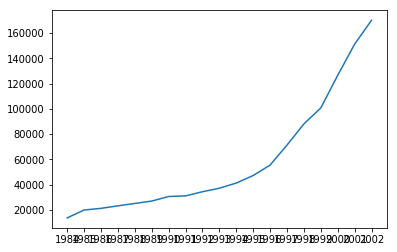

In [28]:
plt.plot(patent.mean());

##### Here above we can observe an exponential increasing trend in the applications for patents over time. I suspect this could be partially due to the population increase, therefore we are going to adjust the number of applications for patents with the populatin numbers (in order to isolate the relationship between mean education and number of application per person, otherwise we might find that some countries have a very high number of applications just because they can count on a very high number of people).

In [29]:
pop = pd.read_csv('population_total.csv',usecols=[0,185,203])
pop.head(2)

,country,1984,2002
0,Afghanistan,12000000,22000000
1,Albania,2900000,3120000


In [30]:
# Here we are creating a dataset with the values of applications 
pat = patent.loc[:,['country','1984','2002']]
pat.head()

,country,1984,2002
1,Algeria,315.0,88900.0
5,Australia,17400.0,107000.0
6,Austria,4220.0,254000.0
11,Barbados,38.0,89700.0
13,Belgium,2840.0,164000.0


#### I'm going to merge population and patents datasets on country, and then make other 2 coulmns for the years 1984 and 2002, of the adjusted values according to the formula (number of patenta application for year i) / (number of people for year i), for each country. 

In [31]:
pat_adj = pat.merge(pop,on='country',how='inner')
pat_adj.head()

,country,1984_x,2002_x,1984_y,2002_y
0,Algeria,315.0,88900.0,21900000,32000000
1,Australia,17400.0,107000.0,15500000,19500000
2,Austria,4220.0,254000.0,7610000,8130000
3,Barbados,38.0,89700.0,255000,271000
4,Belgium,2840.0,164000.0,9910000,10400000


In [32]:
pat_adj['pat_84_adj'] = pat_adj['1984_x']/pat_adj['1984_y']        
pat_adj['pat_02_adj'] = pat_adj['2002_x']/pat_adj['2002_y'] 
pat_adj.head()

,country,1984_x,2002_x,1984_y,2002_y,pat_84_adj,pat_02_adj
0,Algeria,315.0,88900.0,21900000,32000000,0.000014,0.002778
1,Australia,17400.0,107000.0,15500000,19500000,0.001123,0.005487
2,Austria,4220.0,254000.0,7610000,8130000,0.000555,0.031242
3,Barbados,38.0,89700.0,255000,271000,0.000149,0.330996
4,Belgium,2840.0,164000.0,9910000,10400000,0.000287,0.015769


#### I'm going finally to make another column (pat_02_adj)/(pat_84_adj) to see the increment of the patent application between 1984 and 2002 as a ratio, for each country 

In [33]:
pat_adj['pat_ratio_84-02'] = pat_adj['pat_02_adj']/pat_adj['pat_84_adj']
pat_adj.head(2)

,country,1984_x,2002_x,1984_y,2002_y,pat_84_adj,pat_02_adj,pat_ratio_84-02
0,Algeria,315.0,88900.0,21900000,32000000,0.000014,0.002778,193.145833
1,Australia,17400.0,107000.0,15500000,19500000,0.001123,0.005487,4.888005


#### similarly, I'm going to create a dataset with income for years 1984 and 2002, and the ratio between them

In [34]:
income['inc_ratio_84-02'] = income['2002'] / income['1984']
income1 = income.loc[:,['country','delta_inc','inc_ratio_84-02']]
income1.head()

,country,delta_inc,inc_ratio_84-02
0,Afghanistan,350,0.736111
1,Albania,5690,1.403153
2,Algeria,5310,0.972973
3,Andorra,8500,1.123239
4,Angola,360,0.750000


#### Again similarly, I'm going to create a dataset with education for years 1984 and 2002, and the ratio between them

In [35]:
ys_edu_tot['edu_ratio_84-02'] = ys_edu_tot['2002'] / ys_edu_tot['1984']
ys_edu_tot2 = ys_edu_tot.loc[:,['country','delta_edu','edu_ratio_84-02']]
ys_edu_tot2.head()

,country,delta_edu,edu_ratio_84-02
0,Afghanistan,1.15,1.785714
1,Albania,5.30,1.416000
2,Algeria,3.70,2.151515
3,Angola,3.00,1.882353
4,Antigua and Barbuda,5.00,1.261111


#### I'm then going to merge the 3 datasets in a unique one for ease of analysis

In [36]:
df_deltas2 = income1.merge(pat_adj,on='country',how='inner')
df_deltas3 = df_deltas2.merge(ys_edu_tot2,on='country',how='inner').loc[:,['country','delta_edu','edu_ratio_84-02','delta_inc','inc_ratio_84-02','pat_ratio_84-02']]
df_deltas3.head()

,country,delta_edu,edu_ratio_84-02,delta_inc,inc_ratio_84-02,pat_ratio_84-02
0,Algeria,3.70,2.151515,5310,0.972973,193.145833
1,Australia,3.10,1.141414,21500,1.461847,4.888005
2,Austria,3.35,1.153439,24500,1.483146,56.339810
3,Belgium,4.95,1.240437,21500,1.435606,55.025731
4,Brazil,4.70,1.613333,7760,1.169355,11.215278


## Research Question 2
### Here following we are going to analyze the theory number 2), which is to investigate the relationship between number of patents and income, to confirm that the bigger the increase of patent applications for a coutry, the more that country should increase its technological level, therefore its increase in the income

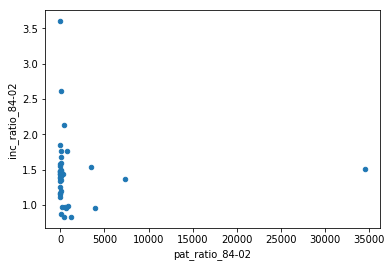

In [37]:
# Here below I'm plotting a scatter plot between the number of pantent applications and the income, 
# in order to investigate the correlation between these 2 variables

df_deltas3.plot(x='pat_ratio_84-02', y='inc_ratio_84-02', kind='scatter');

In [38]:
# I'm going to delete the outliers for pat_ratio
df_deltas3.sort_values(by=['pat_ratio_84-02'], ascending=False).head(10)

,country,delta_edu,edu_ratio_84-02,delta_inc,inc_ratio_84-02,pat_ratio_84-02
23,Mongolia,4.50,1.312500,5670,1.509202,34487.704918
11,Ghana,4.40,1.608696,450,1.362573,7293.467337
21,Malawi,3.30,1.744186,376,0.962333,3914.423077
36,Uganda,3.45,1.660000,410,1.544715,3492.773763
39,Zambia,4.30,1.626866,-760,0.832700,1214.414414
19,Kenya,5.10,1.836066,400,0.981395,830.584634
32,Sri Lanka,5.10,1.383333,5800,1.770440,800.267350
5,Bulgaria,5.10,1.251397,7250,0.962617,592.381128
40,Zimbabwe,5.35,1.662338,-1270,0.974790,527.829333
7,Cuba,4.90,1.306122,8740,0.827586,375.167673


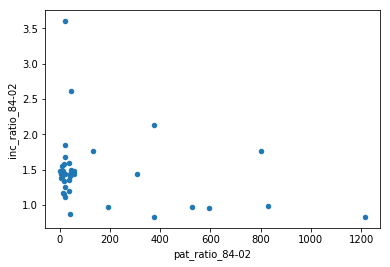

In [39]:
df_deltas4=df_deltas3.drop([23,11,21,36]) # remove first 4 outliers
df_deltas4.plot(x='pat_ratio_84-02', y='inc_ratio_84-02', kind='scatter');

In [40]:
df_deltas4['pat_ratio_84-02'].corr(df_deltas4['inc_ratio_84-02'])

-0.27640250554143314

### Results: Slight negative correlation (-0.27) between number of patent applications and income, which contraddicts my theory at point 2) of the introduction, showing that apparently a high number of patent applications doesn't necessarily lead to an increase in the income for that country

## Research Question 3
### Here following we are going to analyze the theory number 3) , which is investigating the relationship between number of patent applications and education, to confirm that the bigger is the increase in the education in a coutry, the bigger  should be the increase of patent applications, as bigger knowledge helps in generating innovative ideas   

In [41]:
# Here we are going to analyze the relationship between number of patents and education, 
# to confirm the theory that the bigger is the increase in the education, the bigger 
# the increase of applications for patents in a coutry, as bigger knowledge helps in 
# creating innovative ideas   

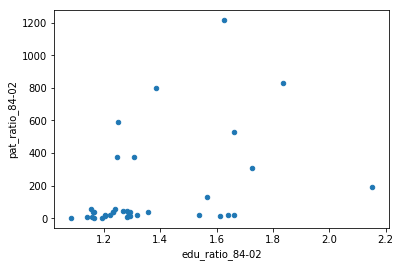

In [42]:
df_deltas4.plot(x='edu_ratio_84-02', y='pat_ratio_84-02', kind='scatter');

In [43]:
df_deltas4['pat_ratio_84-02'].corr(df_deltas4['edu_ratio_84-02'])

0.41201957696436226

### Results: Positive correlation (0.41) between education and number of patent applications, which confirms my theory at point 3) of the introduction, stating that the education impacts positively the ability of generating innovative ideas

## Now we are going to wrangle the 'sector' variable

In [89]:
# import the 3 datasets about sector % by country, over time

agri = pd.read_csv('agriculture_workers_percent_of_employment.csv')
indu = pd.read_csv('industry_workers_percent_of_employment.csv')
serv = pd.read_csv('service_workers_percent_of_employment.csv')

#### Let's take a quick look at the datasets

In [90]:
agri.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.1,NaN,NaN,NaN,38.6,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.6,44.0,42.1,45.4,46.0,44.0,42.7,41.3,NaN,NaN


In [91]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 49 columns):
country    176 non-null object
1970       24 non-null float64
1971       25 non-null float64
1972       26 non-null float64
1973       32 non-null float64
1974       34 non-null float64
1975       41 non-null float64
1976       41 non-null float64
1977       42 non-null float64
1978       44 non-null float64
1979       44 non-null float64
1980       43 non-null float64
1981       48 non-null float64
1982       53 non-null float64
1983       52 non-null float64
1984       48 non-null float64
1985       49 non-null float64
1986       51 non-null float64
1987       48 non-null float64
1988       49 non-null float64
1989       57 non-null float64
1990       65 non-null float64
1991       70 non-null float64
1992       75 non-null float64
1993       80 non-null float64
1994       82 non-null float64
1995       84 non-null float64
1996       88 non-null float64
1997       92 non-null floa

In [92]:
indu.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.4,NaN,NaN,NaN,16.6,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.8,19.9,20.6,18.9,17.3,16.8,17.4,18.6,NaN,NaN


In [93]:
serv.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,NaN,43.6,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.6,36.0,37.3,35.8,36.6,38.8,39.4,39.9,NaN,NaN


#### As we see many missing values, I think it would be a good idea, instead of to drop any row with 1 or more missing values, to replace them with the mean of each row. That is what I'm going to do here below

In [94]:
m = agri.mean(axis=1)
for i, col in enumerate(agri):
    agri.iloc[:, i] = agri.iloc[:, i].fillna(m)
agri.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,48.850000,48.850000,48.850000,48.850000,48.850000,48.850000,48.850000,48.850000,48.850000,...,59.1,48.85,48.85,48.85,38.6,48.85,48.85,48.85,48.850000,48.850000
1,Albania,56.363636,56.363636,56.363636,56.363636,56.363636,56.363636,56.363636,56.363636,56.363636,...,44.6,44.00,42.10,45.40,46.0,44.00,42.70,41.30,56.363636,56.363636


In [95]:
agri_70_17 = agri.mean()

In [96]:
n = indu.mean(axis=1)
for i, col in enumerate(indu):
    indu.iloc[:, i] = indu.iloc[:, i].fillna(n)
indu.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,14.500000,14.500000,14.500000,14.500000,14.500000,14.500000,14.500000,14.500000,14.500000,...,12.4,14.5,14.5,14.5,16.6,14.5,14.5,14.5,14.500000,14.500000
1,Albania,14.014545,14.014545,14.014545,14.014545,14.014545,14.014545,14.014545,14.014545,14.014545,...,17.8,19.9,20.6,18.9,17.3,16.8,17.4,18.6,14.014545,14.014545


In [97]:
indu_70_17 = indu.mean()

In [98]:
o = serv.mean(axis=1)
for i, col in enumerate(serv):
    serv.iloc[:, i] = serv.iloc[:, i].fillna(o)
serv.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,35.850000,35.850000,35.850000,35.850000,35.850000,35.850000,35.850000,35.850000,35.850000,...,28.1,35.85,35.85,35.85,43.6,35.85,35.85,35.85,35.850000,35.850000
1,Albania,29.540909,29.540909,29.540909,29.540909,29.540909,29.540909,29.540909,29.540909,29.540909,...,37.6,36.00,37.30,35.80,36.6,38.80,39.40,39.90,29.540909,29.540909


In [99]:
serv_70_17 = serv.mean()

####  I'm now going to adapt the 'income' dataset used previously, in order to match the time period of 'sector' dataframes

In [100]:
avg_inc_70_17 = income.mean()['1970':'2017']

## Research Question 4
### Here following we are going to analyze the theory number 4) , which is investigating the relationship between different sectors and income, as a country being "service-oriented" should be a sign that its technology is advanced, as opposite as a country for which the main sector is "agricultural" or "industrial"

In [101]:
# Now that we have sector datasets with no missing values and the income dataset with natching time period,
# we are going to see the correlations between each sector and the income

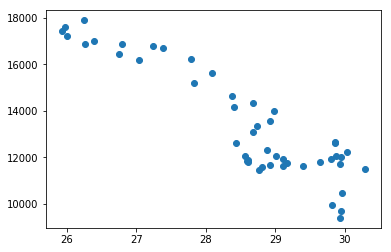

In [102]:
plt.scatter(x=agri_70_17,y= avg_inc_70_17);

In [104]:
agri_70_17.corr(avg_inc_70_17)

-0.9075905440640887

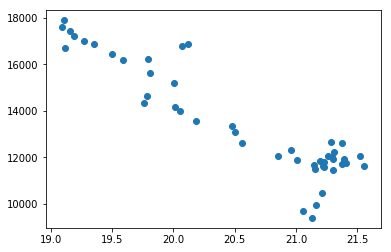

In [108]:
plt.scatter(x=indu_70_17,y= avg_inc_70_17);

In [109]:
indu_70_17.corr(avg_inc_70_17)

-0.9177055532006038

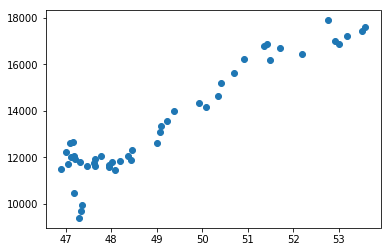

In [110]:
plt.scatter(x=serv_70_17,y= avg_inc_70_17);

In [111]:
serv_70_17.corr(avg_inc_70_17)

0.948267598898907

### Results: Strong negative correlation (-0.91 and 0.92 respectively) between agricultural sector % vs income and industrial sector % vs income, in addition to a strong positive correlation between service sector % vs income, which seems to agree with the theory at point 4) 

<a id='conclusions'></a>
## Conclusions

>### 1) Education has a slight positive impact on income, POTENTIALLY because as the more knowledgeable people of a specific country are, the more that country should be able to produce prosperity.
>### 2) The number of patent applications in a country has a slight negative impact on its income. Using logic I expected a different result, also this inverse correlation is not a proof that my theory at point 2) was wrong, it's just an indication that doesn't support the theory.
>### 3) Education has a positive impact in the number of patent applications, POTENTIALLY because a higher knowledge helps in generating innovative ideas.
>### 4) There is a strong correlation between what the main sector is (agricolture, industry or services) and the income, POTENTIALLY because having a high % of workers in the services sectors mean a high level of technology, which could explain a higher income, and vice versa.